In [1]:
# 1. IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# 2. READING THE DATA
stock=pd.read_csv('S&P500_Stock_Data.csv')

In [4]:
#3 UNDERSTANDING THE DATA
report=ProfileReport(stock)
report.to_file(output_file='stock.html')

In [5]:
# 4. TEST TRAIN SPLIT
X=stock[['Interest Rates','Employment']]
y=stock['S&P 500 Price']

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [7]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
print(f'Multiple Lin Model Coeff: {regressor.coef_}')
print(f'Multiple Lin Model Constant: {regressor.intercept_}')

Multiple Lin Model Coeff: [730.50972033  12.18926058]
Multiple Lin Model Constant: 31.552228079163342


In [9]:
y_predict=regressor.predict(X_test)

In [13]:
n=len(X_test)
n

250

In [14]:
k=X_test.shape[1]
k

2

In [15]:
r2=r2_score(y_test,y_predict)
r2

0.8922772505766146

In [16]:
adj_r2=1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.8914050015934293

In [19]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

47.88849936101293

In [20]:
MSE=mean_squared_error(y_test,y_predict)
MSE

3596.2897996949696

In [21]:
MAPE=np.mean(np.abs((y_test-y_predict)/y_test))*100
MAPE

2.078187640050911

In [23]:
RMSE=np.sqrt(MSE)
RMSE

59.9690736938213

In [30]:
print(tabulate([['RMSE',RMSE],['MSE',MSE],['MAE',MAE],['R2',r2],['ADJ_R2',adj_r2]], numalign='left'))

------  --------
RMSE    59.9691
MSE     3596.29
MAE     47.8885
R2      0.892277
ADJ_R2  0.891405
------  --------


In [33]:
x_surf, y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(),stock['Interest Rates'].max(),100),np.linspace(stock['Employment'].min(),stock['Employment'].max(),100))                            

In [34]:
onlyX=pd.DataFrame({'Interest Rates':x_surf.ravel(),'Employment':y_surf.ravel()})

In [35]:
fittedY=regressor.predict(onlyX)
fittedY=fittedY.reshape(x_surf.shape)

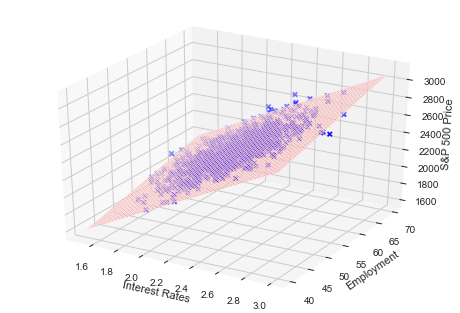

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],color='blue', marker='x')
ax.plot_surface(x_surf, y_surf,fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Employment')
ax.set_zlabel('S&P 500 Price')
plt.show()